In [34]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [35]:
data_train_path = r'F:\Projects\dataset\Train'
data_test_path = r'F:\Projects\dataset\Test'
data_val_path = r'F:\Projects\dataset\Validation'

In [36]:
img_width = 180
img_height = 180
num_classes = 3

In [37]:
data_train = tf.keras.utils.image_dataset_from_directory(
  data_train_path,
  shuffle = True,
  image_size = (img_width, img_height),
  batch_size=32,
  validation_split= False,
  color_mode='grayscale')

Found 5169 files belonging to 3 classes.


In [38]:
data_cat = data_train.class_names
data_cat

['Brain', 'Heart', 'Liver']

In [39]:
data_train = data_train.map(lambda x, y: (x/255.0, tf.one_hot(y, depth=num_classes)))

In [40]:
next(iter(data_train))[1]

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [41]:
data_test = tf.keras.utils.image_dataset_from_directory(
  data_test_path,
  shuffle = True,
  image_size = (img_width, img_height),
  batch_size=32,
  validation_split= False,
  color_mode='grayscale')

Found 1169 files belonging to 3 classes.


In [42]:
data_val = tf.keras.utils.image_dataset_from_directory(
  data_val_path,
  shuffle = True,
  image_size = (img_width, img_height),
  batch_size=32,
  validation_split= False,
  color_mode='grayscale')

Found 896 files belonging to 3 classes.


In [43]:
data_val = data_val.map(lambda x, y: (x/255.0, tf.one_hot(y, depth=num_classes)))

In [44]:
np.unique(next(iter(data_val))[0])

array([0.0000000e+00, 4.8390791e-07, 4.8399102e-07, ..., 9.9996245e-01,
       9.9997348e-01, 1.0000000e+00], dtype=float32)

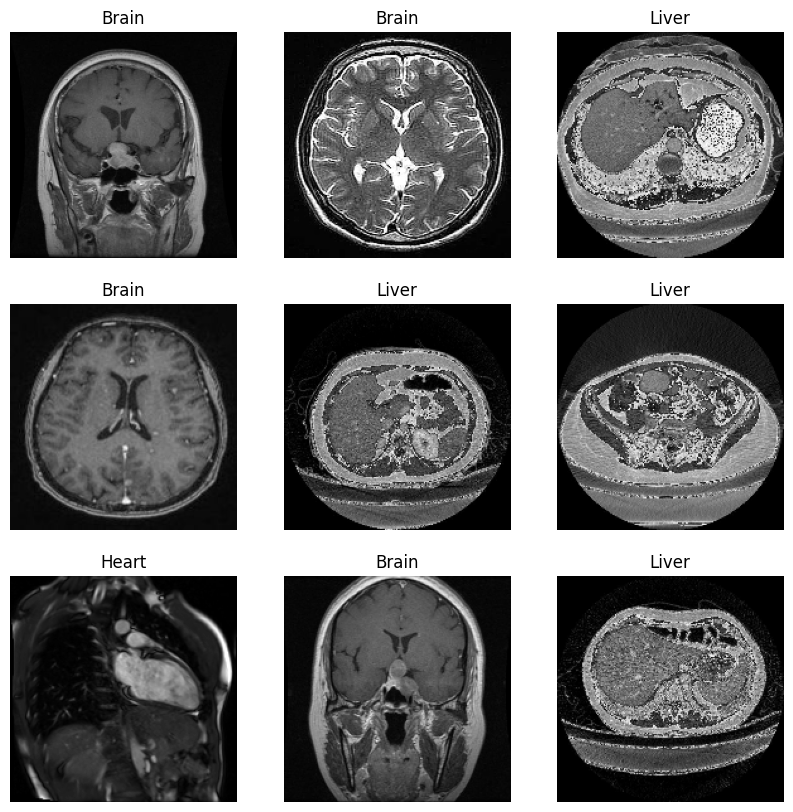

In [45]:
plt.figure(figsize = (10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i,:,:,0].numpy(), cmap='gray')
        plt.title(data_cat[np.argmax(labels[i])])
        plt.axis('off')

In [46]:
from tensorflow.keras.models import Sequential

In [47]:
num_classes = len(data_cat)

model = Sequential([
#     layers.Rescaling(1.0 / 255, input_shape=(180, 180, 1)),  # For grayscale images use (180, 180, 1)
    layers.InputLayer(shape=(180, 180, 1)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Flatten and add dense layers
    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(128, activation='relu'),

    # Output layer with softmax for multi-class classification
    layers.Dense(num_classes, activation='softmax')  # Change to num_classes
])

In [48]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Suitable for integer class labels
              metrics=['accuracy']) # use other data imbalance friendly metrics 

In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 180, 180, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,023,043 (30.61 MB)

 Trainable params: 8,023,043 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 63s 385ms/step - accuracy: 1.0000 - loss: 1.2428e-05 - val_accuracy: 0.9989 - val_loss: 0.0031
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 63s 386ms/step - accuracy: 1.0000 - loss: 5.2682e-06 - val_accuracy: 0.9989 - val_loss: 0.0029
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 63s 385ms/step - accuracy: 1.0000 - loss: 3.0246e-06 - val_accuracy: 0.9989 - val_loss: 0.0030
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 60s 371ms/step - accuracy: 1.0000 - loss: 3.0106e-06 - val_accuracy: 0.9989 - val_loss: 0.0029
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 61s 377ms/step - accuracy: 1.0000 - loss: 2.8192e-06 - val_accuracy: 0.9989 - val_loss: 0.0034
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 61s 373ms/step - accuracy: 1.0000 - loss: 2.3830e-06 - val_accuracy: 0.9989 - val_loss: 0.0034
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 59s 364ms/step - accuracy: 1.0000 - loss: 3.2183e-06 - val_accuracy: 0.9989 - val_loss: 0.0031
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 63s 389ms/step 

In [76]:
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf

# Load the image in grayscale and resize
image_path = r'F:\Projects\dataset\Train\Brain\Tr-piTr_0007.jpg'
image = load_img(image_path, target_size=(img_height, img_width), color_mode='grayscale')  # Load as grayscale

# Convert the image to a NumPy array
img_arr = img_to_array(image)  # This is the correct function to convert to array format

# Optionally normalize the pixel values (if not already handled by a Rescaling layer in the model)
img_arr = img_arr / 255.0

# Add batch dimension for prediction
img_bat = tf.expand_dims(img_arr, axis=0)

In [77]:
img_bat.shape

TensorShape([1, 180, 180, 1])

In [78]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


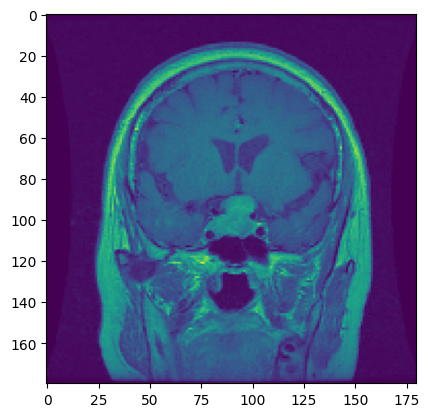

In [80]:
plt.imshow(img_bat[0, :,:,0])

In [81]:
predict

array([[1.000000e+00, 6.835745e-14, 3.751830e-13]], dtype=float32)

In [82]:
print('The organ in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(predict)],np.max(predict)*100))

The organ in image is Brain with accuracy of 100.00


In [83]:
model.save('Organ_classify.keras')